In [38]:
import os
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
% matplotlib inline

In [61]:
BROADWAY_DATA_URL = "https://data.seattle.gov/api/views/j4vh-b42a/rows.csv?accessType=DOWNLOAD"

def get_broadway_data(url=BROADWAY_DATA_URL, filename="broadway_bike_data.csv"):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    data = (pd.read_csv(filename, index_col='Date')
            .loc[:, ['NB', 'SB', 'Broadway Cycle Track North Of E Union St Total']])
    pd.to_datetime(data.index, format='%m/%d/%Y %H:%M:%S %p')
    data.columns = ['North-bound', 'South-bound', 'Total']
    return data

In [62]:
data = get_broadway_data()
data.head()

,North-bound,South-bound,Total
Date,,,
01/01/2014 12:00:00 AM,0.0,2.0,2.0
01/01/2014 01:00:00 AM,3.0,10.0,13.0
01/01/2014 02:00:00 AM,0.0,2.0,2.0
01/01/2014 03:00:00 AM,0.0,0.0,0.0
01/01/2014 04:00:00 AM,0.0,0.0,0.0


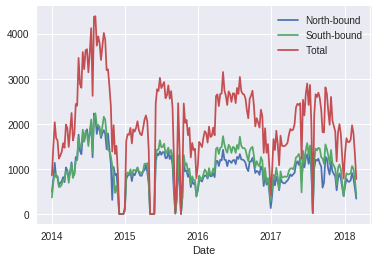

In [39]:
data.resample('W').sum().plot()

[(0, 130278.55)]

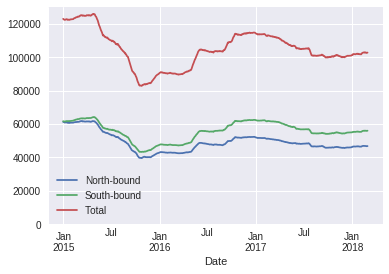

In [47]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set(ylim=(0, None));

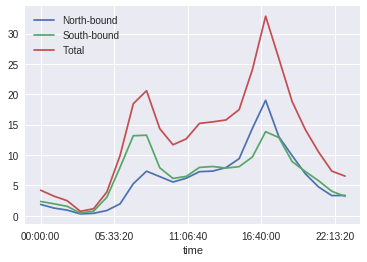

In [48]:
data.groupby(data.index.time).mean().plot()

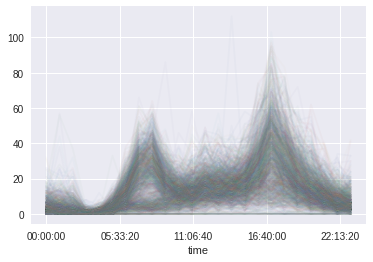

In [50]:
time_v_date_pivot = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
time_v_date_pivot.plot(legend=False, alpha=0.03)